In [2]:
%matplotlib inline
%config InlineBackend.figure_format="retina"
from IPython.display import Image

# Opslingering van de vraag in distributieketens

In dit interactieve notebook kan een student zichzelf aan de hand van computersimulatie inzicht verschaffen in het zogenaamde "bullwhip effect" van distributieketens. Het fenomeen is het gevolg van opslingering van de vraag stroomopwaarts in een distributieketen als reactie op een verandering van de vraag naar eindproducten. Jay W. Forrester (1918-2016), de grondlegger van System Dynamics, is degene die het opslingereffect voor het eerst heeft beschreven en verklaard in de jaren 60 van de vorige eeuw. Om deze reden wordt het fenomeen ook wel het "Forrester effect" genoemd. Voor een beschrijving ervan wordt verwezen naar het nog altijd zeer lezenswaardige Forrester (1961). Van belang om te beseffen is dat de opslingering van de vraag optreedt als gevolg van het gedrag van actoren in de distributieketen. De vraagverandering is wel de *bron* van de opslingering, maar niet de *oorzaak* van het systeemgedrag. De oorzaken zijn te vinden in de wijze waarop distributiesystemen op de vraagverandering reageren. Eerst zal worden gesimuleerd met een model van een enkelvoudig productiesysteem. Daarna zal worden gesimuleerd met een distributieketen die bestaat uit drie in serie geschakelde soortgelijke productiesystemen. Tenslotte zal een distributiesysteem worden gesimuleerd waarbij een regelkring op centraal niveau is aangebracht om opslingering te vermijden en de onbedoelde consequenties ervan te reduceren.

## Simuleren van een productiesysteem

In onderstaande afbeelding is een systeemkundig model opgenomen van de logistieke besturing van een productiesysteem. Te zien is dat sprake is van een "Make to Stock" logistieke grondvorm waarbij uit voorraad wordt geleverd aan klanten.

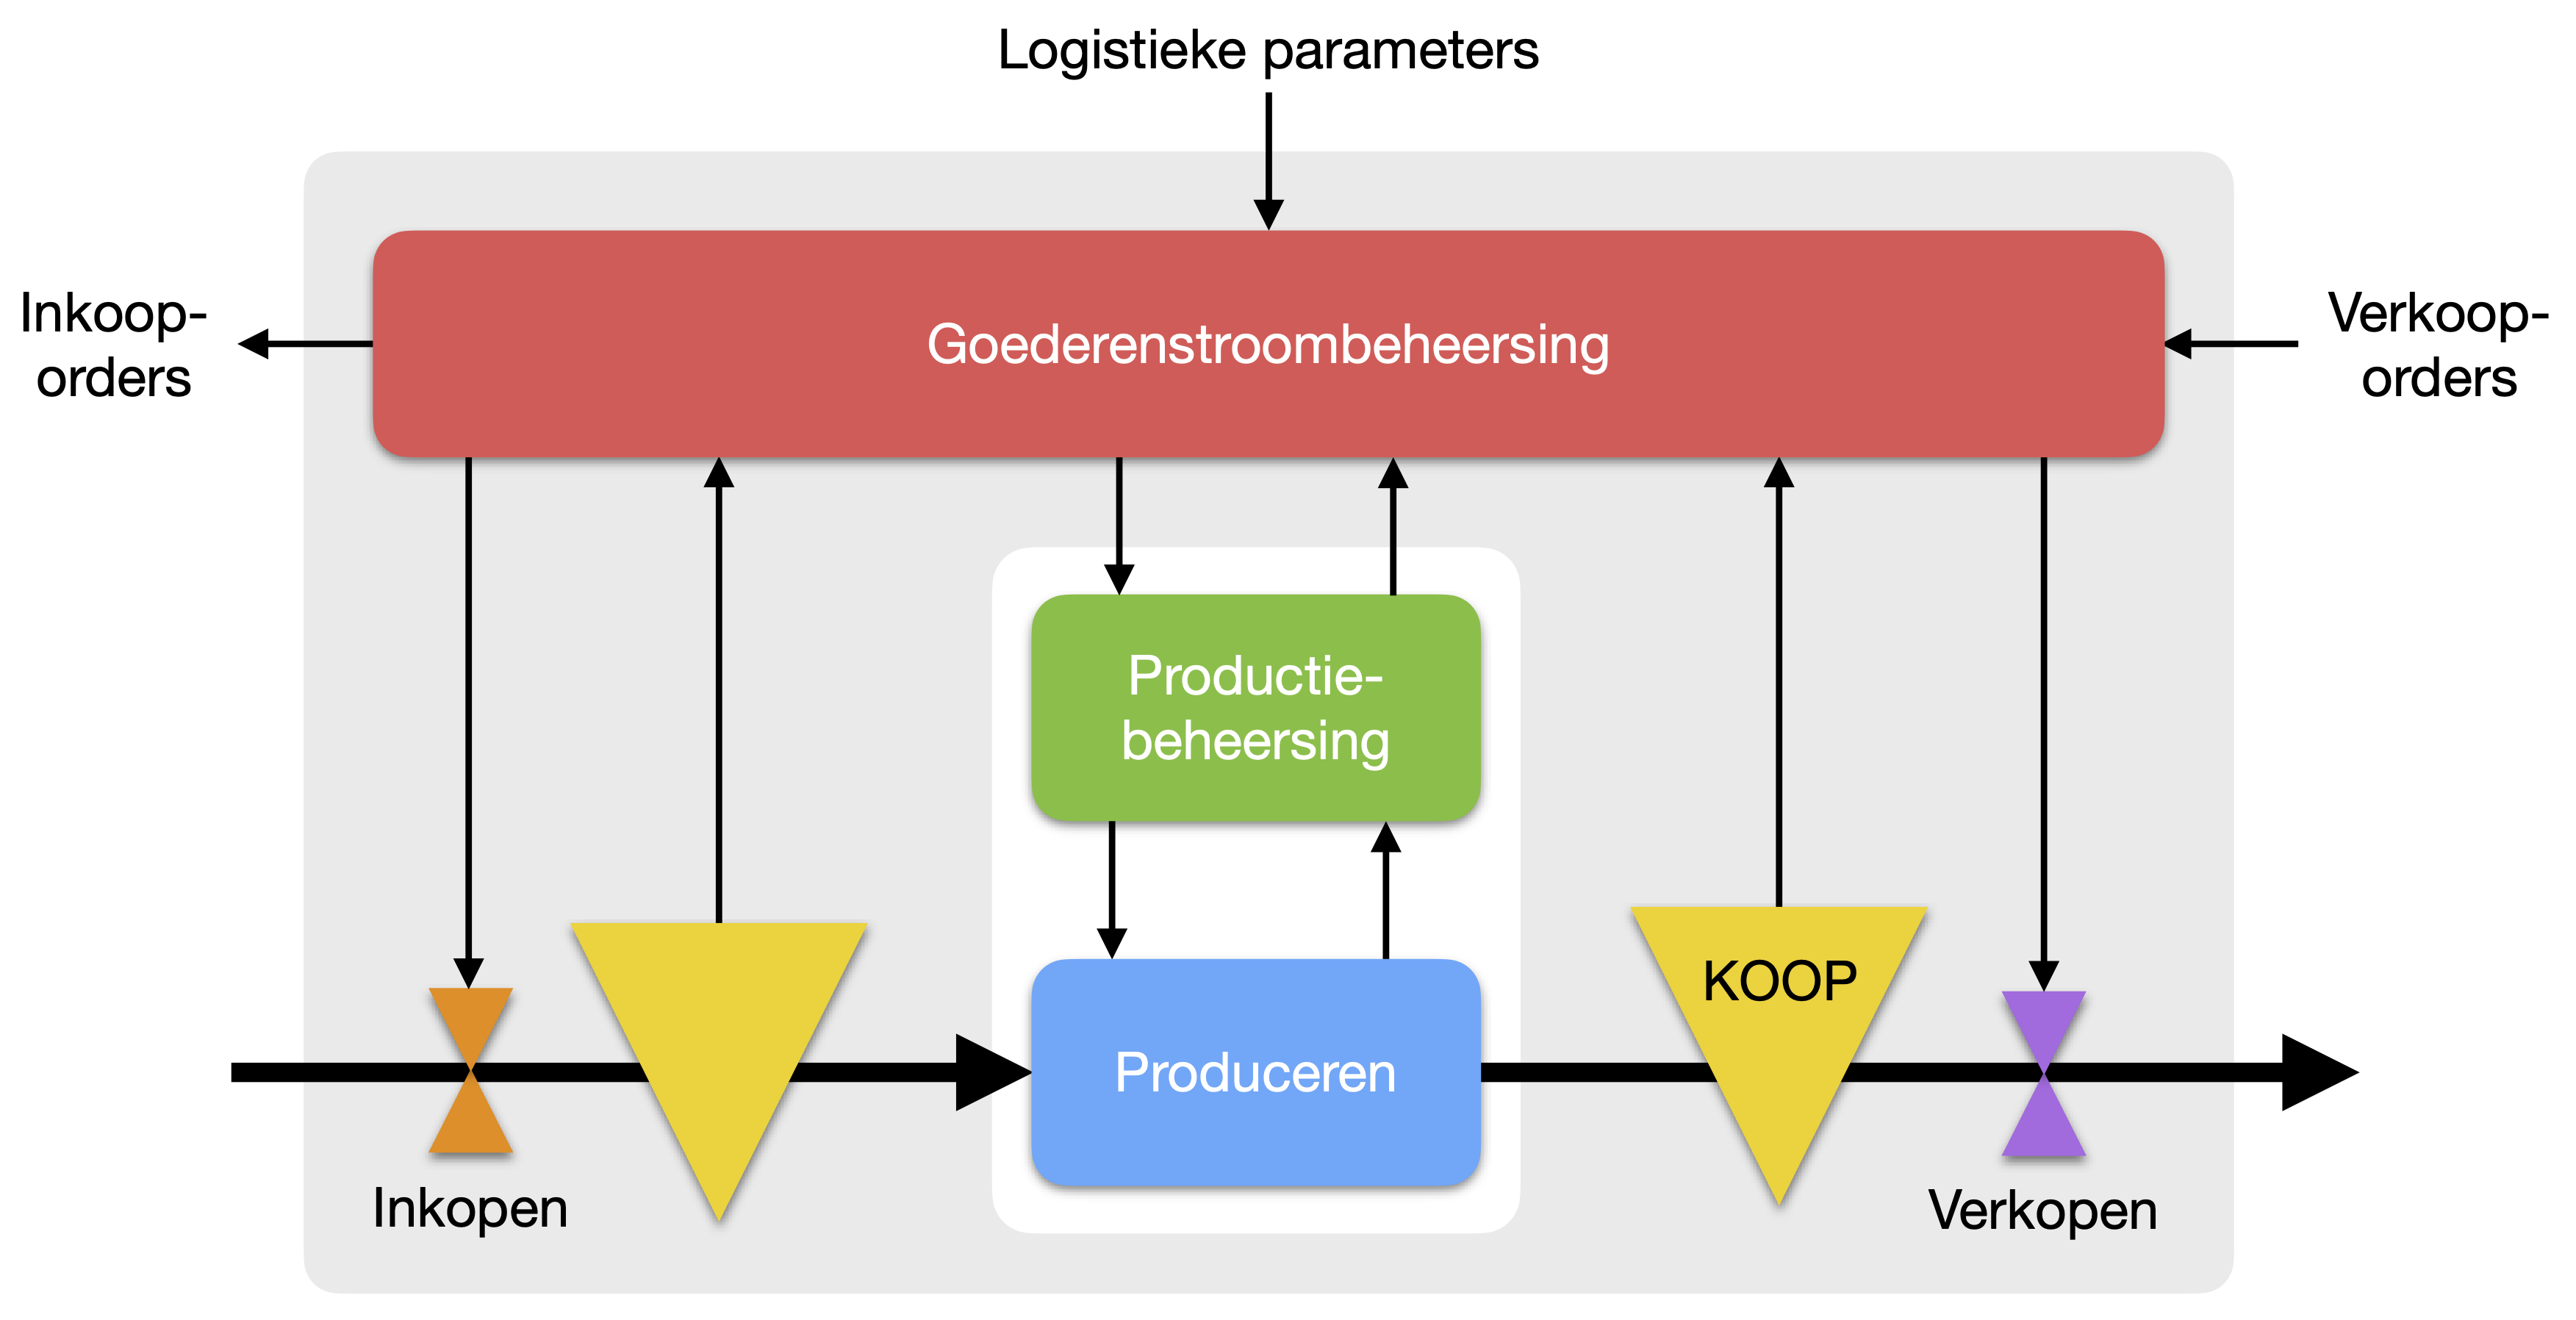

In [3]:
Image(filename='Besturingsconcept schakel.png', width=500)

In de onderstaande afbeelding is een stock-flow model van het productiesysteem weergegeven. Deze is gebasserd op het "Stock Management Problem", zoals beschreven in Sterman (2000). Met het stock-flow model wordt beoogd om het effect te laten zien van de mate waarin bij het bepalen van voorraadaanpassingen door het management rekening wordt gehouden met de "pijplijnvoorraad" die onderweg is. Deze pijplijnvoorraad bestaat uit de vooraad met inkomende goederen en het onderhandenwerk van de productie.

Ten opzichte van het systeemkundig model is in het stock-flow model de vooraad met inkomende goederen en het onderhandenwerk van de productie samengenomen in de stock pijplijn. In het stock-flow model zijn twee belangrijke regelkringen op basis van negatieve terugkoppeling opgenomen. De functie van deze regelkringen is om veranderingen in de vraag te verwerken zodanig dat de vraag, inkopen en verkopen op elkaar worden afgestemd. Deze afstemming zal met de nodige traagheid gepaard gaan, wat bij dynamische systemen onvermijdelijk is.

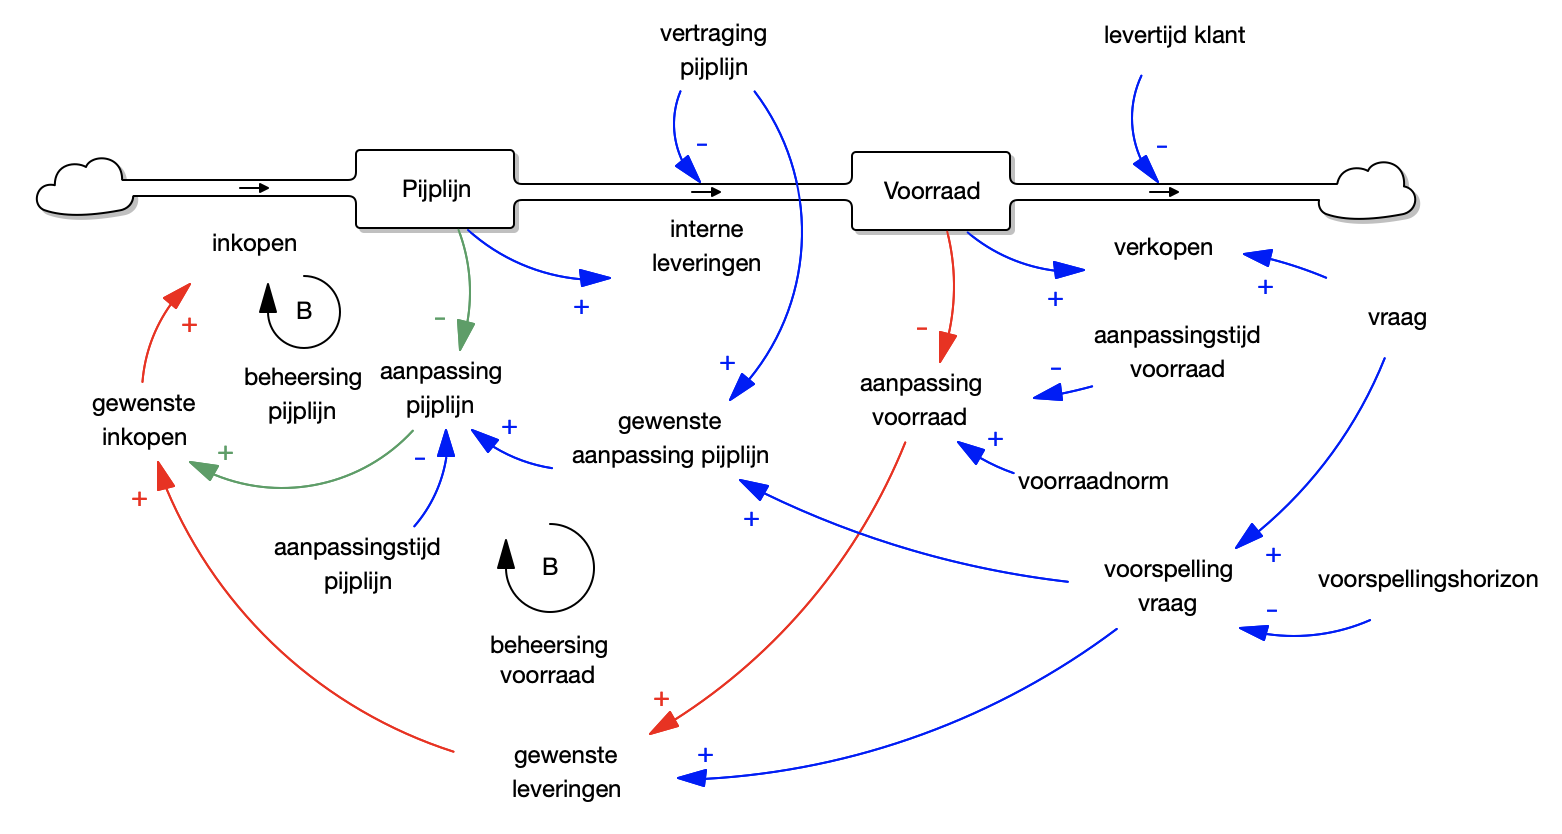

In [4]:
Image(filename='Productiesysteem.png', width=700)

De rode regelkring heeft betrekking op de beheersing van de voorraad aan eindproducten. De te nemen maatregel (gewenste leveringen) bestaat uit de som van de vraagvoorspelling en voorraadafwijking. Deze gewenste leveringen worden gecorrigeerd voor de pijplijnvoorraad. De gewenste pijplijnvoorraad in de groene regelkring wordt bepaald op basis van de vraagvoorspelling en de te nemen maatregel bestaat uit een aanpassing van de pijplijnvoorraad op basis van de feitelijke voorraad in de pijplijn. De gewenste inkopen bestaan uit de som van de aanpassing van de pijplijn en de gewenste leveringen. Voor de vraagvoorspelling is gebruik gemaakt van "simple exponential smoothing".

De mate waarin rekening wordt gehouden met de pijplijnvoorraad kan worden ingesteld met de variabele aanpassingstijd pijplijn. Als deze aanpassingstijd of tijdconstante heel groot genomen wordt ($\tau \rightarrow \infty$) dan betekent dat feitelijk dat door het management geen rekening wordt gehouden met de pijplijnvoorraad. Andersom geldt dat wanneer de aanpassingstijd kort genomen wordt, dit betekent dat het management wel rekening houdt met de pijplijnvoorraad.

De norm voor de gewenste aanpassing van de pijplijn is zoals beschreven gebaseerd op de vraagvoorspelling. Hiermee wordt uitgedrukt dat het management de gewenste leveringen even groot wil maken als de vraag. In formulevorm kan deze norm als volgt worden uitgedrukt:

$$
\begin{equation}
GAP = VSP \cdot PVT \quad \mathrm{[stuks]}
\end{equation}
$$

Hierin heeft $GAP$ betrekking op de gewenste aanpassing van de pijplijn, $VSP$ op de voorspelling en $PVT$ op de pijplijnvertraging. Het zou echter rationeler zijn als bij het bepalen van de gewenste aanpassing van de pijplijnvoorraad niet alleen met de vraagvoorspelling, maar ook met de gewenste voorraadaanpassing $GAV$ rekening zou worden gehouden:

$$
\begin{equation}
GAP = (VSP + GAV) \cdot PVT \quad \mathrm{[stuks]}
\end{equation}
$$

In de simulatie zal het effect van beide strategieën worden verkend. Door onderstaande cel in het interactieve notebook te starten, dit kan door het drukken op CTRL + ENTER of door het klikken op het driehoekje in de menubalk bovenaan het notebook, verschijnt een interactief menu met drie tabbladen. In het eerste tabblad kan de tijd worden ingesteld waarmee het management de pijplijnvoorraad wenst aan te passen, standaard staat deze op 1 week. Op het tweede tabblad kan een van de twee boven beschreven strategieën worden ingesteld voor de norm van de aanpassing van de pijplijnvoorraad. Standaard staat deze ingesteld op de eerste strategie, door te klikken op het vlakje kan de tweede meer rationele strategie worden geselecteerd. Op het derde tabblad kan tenslotte de voorspellingshorizon worden ingesteld. Hiermee wordt de gemiddelde tijd uitgedrukt tussen twee opeenvolgende voorspellingen. Deze staat standaard ingesteld op 2 week. Druk op "Run Interact" om de simulatie te starten.

Als het goed is verschijnen er vier grafieken. In de eerste grafiek wordt de voorraad aan eindproducten en de pijplijnvoorraad gevisualiseerd. De totale voorraad, zijnde de som van de voorraad eindproducten en de pijplijnvooraad, wordt in de tweede grafiek weergegeven. De derde grafiek heeft betrekking op de vraag en de vraagvoorspelling. In de vierde grafiek is een fasediagram opgenomen, hierover straks meer. Het productiesysteem start vanuit evenwicht of "steady state" en op t=0 verandert de vraag sprongsgewijs van 100 naar 200 stuks per week.

Maak de volgende opdrachten:
1. Varieer in het eerste tabblad, die betrekking heeft op de aanpassingstijd van de pijplijnvoorraad, de aanpassingstijd van laag tot hoog. Welke systeemgedrag treedt op bij de eindvoorraad, pijplijnvoorraad en totale voorraad naarmate de aanpassingstijd toeneemt?
2. In hoeverre is het productiesysteem in staat om te allen tijde aan de vraag te voldoen?
2. Onderzoek het effect van de twee strategieën op het systeemgedrag. Stel hiertoe eerst de aanpassingstijd van de pijplijnvoorraad in op 1 week en bepaal het effect van iedere strategie. Wordt het systeem stabieler of juist instabieler met de rationele strategie? Stel vervolgens de aanpassingstijd van de pijplijnvoorraad in op 10 weken en bepaal opnieuw het effect van de twee strategieën. Verandert de resonantiefrequentie afhankelijk van de strategie? Wordt deze hoger of lager bij de rationele strategie?
3. Stel de aanpassingstijd van de pijplijnvoorraad in op 10 weken en kies de niet-rationele strategie. Varieer vervolgens in het derde tabblad de voorspellingshorizon van laag tot hoog. Wat is het effect van de voorspellingshorizon op het gedempte oscillatorisch gedrag van het productiesysteem?

In [34]:
%run Schakel.py

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<Figure size 576x288 with 0 Axes>

Om de oorzaken van het instabiele systeemgedrag en de gedempte oscillatie te achterhalen, kan gebruik worden gemaakt van een fasediagram (de onderste grafiek uit bovenstaande simulatie). In een fasediagram worden twee toestandsvariabelen van een dynamisch systeem tegen elkaar uitgezet. Een toestandsvariabele heeft betrekking op een stock of accumulatie. In bovenstaand fasediagram zijn de stocks eindvoorraad $EV$ en de pijplijnvoorraad $PV$ tegen elkaar uitgezet. Om het systeemgedrag te verklaren moet eerst de bovenstaande simulatie opnieuw worden uitgevoerd. Stel de aanpassingstijd van de pijplijnvoorraad in op 10 weken, kies de niet-rationele strategie en stel de voorspellingshorizon in op 1 week. Druk vervolgens op "Run Interact".

In de grafiek kan worden afgelezen hoe de stocks ten opzichte van elkaar variëren. Bij aanvang van de simulatie op $t=0$ is $EV(0) = 400$ en $PV(0) = 300$. Aan het einde van de simulatie op $t=60$ zijn de toestanden van het systeem $EV(60 = 400$ en $TV(60) = 600$. De volgende zaken vallen op in het fasediagraam gedurende de weg van de begintoestanden naar de eindtoestanden:
- Naarmate $EV$ afneemt, neemt $PV$ geleidelijk toe;
- Wanneer $EV$ weer gaat toenemen, neemt eerst ook $PV$ weer toe;
- Als $EV$ verder stijgt, neemt $PV$ licht af;
- In de buurt van het nieuwe "steady state" eindpunt schiet $EV$ eerst voorbij 400 stuks en kort daarna schiet $PV$ onder 600 stuks;
- Daarna schiet $EV$ weer onder 400 stuks en vervolgens schiet $PV$ voorbij 600 stuks;
- Uiteindelijk komt het productiesysteem tot rust in het punt $(400, 600)$.

In het fasediagram wordt het door het productiesysteem afgelegde traject gevisualiseerd van het evenwicht aan het begin, naar het nieuwe evenwicht aan het einde. Hierbij valt op dat de twee toestanden niet gelijktijdig laag c.q. hoog zijn. Er is in meer technische termen sprake van dat $EV$ en $TV$ niet met elkaar in fase zijn. Het faseverschil blijkt overigens ook al uit de andere grafieken. ook daar is namelijk te zien dat de twee toestanden niet op hetzelfde moment pieken. Het oscillatorisch gedrag van het productiesysteem wordt veroorzaakt door het faseverschil tussen de twee toestanden. Naarmate in het model bij de inkopen minder rekening wordt gehouden met de pijplijnvooraad, neemt het faseverschil toe en wordt het oscillatorisch gedrag van het productiesysteem groter. Later in het notebook zal duidelijk worden gemaakt hoe het faseverschil kan worden verminderd, nu zal eerst een distributieketen van drie identieke schakels worden gesimuleerd op basis van het stock-flow model van het productiesysteem.

## Simuleren van een distributieketen

Om het effect van opslingering van de vraag in een distributieketen te simuleren, is op basis van het stock-flow model van het productiesysteem een "supply chain" van drie schakels gemodelleerd. In de distributieketen worden eerst onderdelen geproduceerd. Deze onderdelen worden vervolgens gebruikt om samengestelde componenten te maken. Tenslotte worden de componenten gebruikt bij het produceren of assembleren van de eindproducten. In het algemeen zal sprake zijn van een zekere vermenigvuldigingsfactor in de verhouding tussen een eindproduct en de hoeveelheid componenten, hetzelfde geldt voor de vervouding tussen een component en de hoeveelheid onderdelen. In het model is hiermee geen rekening gehouden om de opslingering van de vraag makkelijk interpreteerbaar te houden. Bij de interpretatie van de simulatieresultaten moet dus in beschouwing worden genomen dat om één eindproduct te maken, één set componenten nodig is. Ook geldt dat voor één component één set onderdelen wordt gevraagd. In onderstaand systeemkundig model is het besturingsconcept van de distributieketen gevisualiseerd.

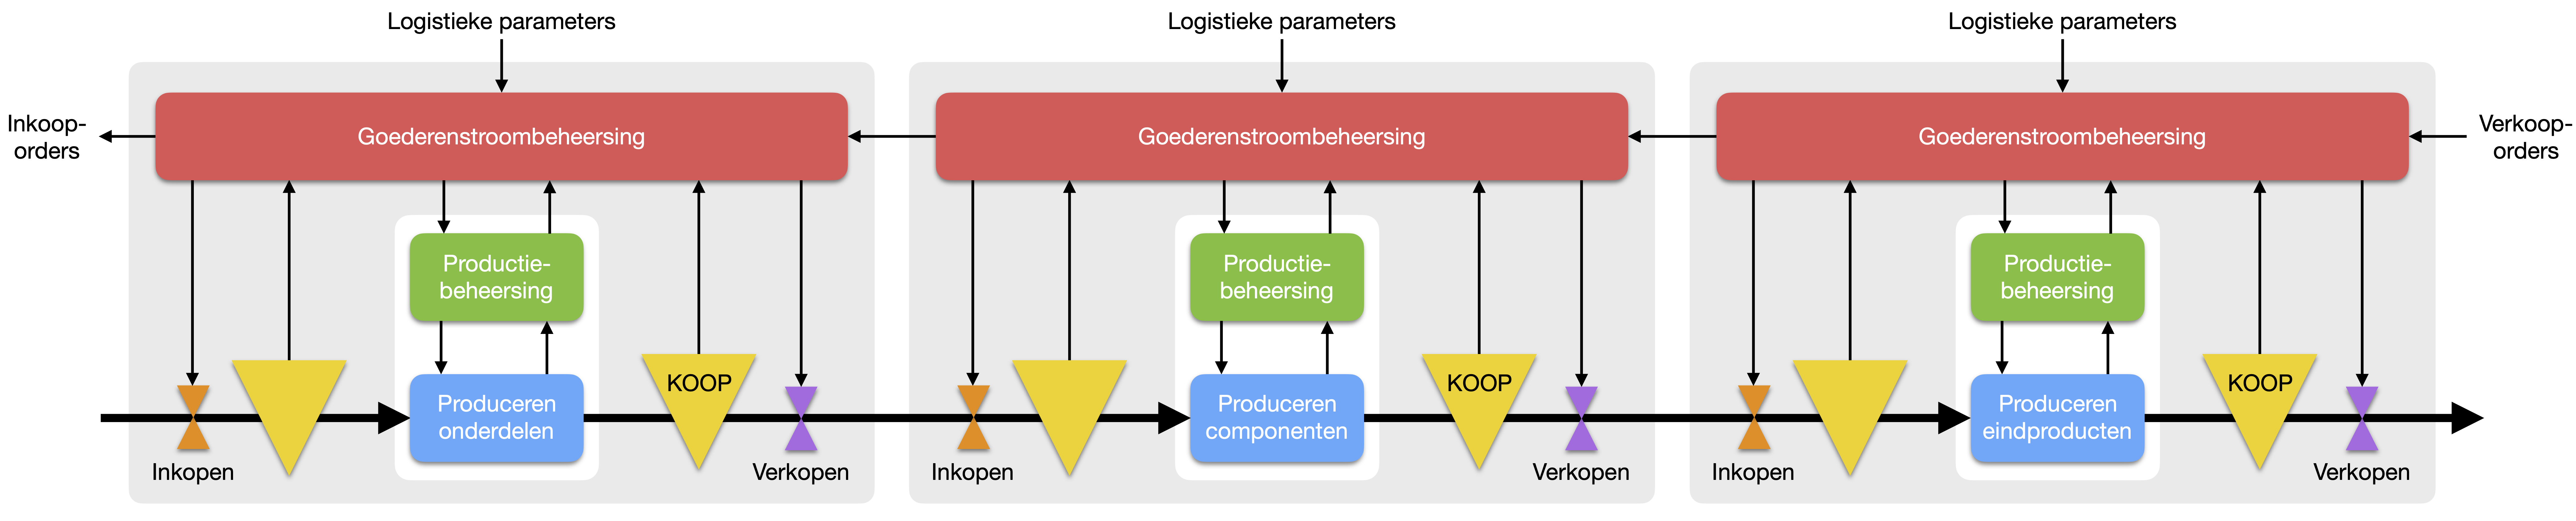

In [6]:
Image(filename='Besturingsconcept keten.png', width=900)

Maak de volgende opdrachten:
1. Varieer in het eerste tabblad, die betrekking heeft op de aanpassingstijden van de pijplijnvoorraden, de aanpassingstijd per schakel in de distributieketen van laag tot hoog. Welke systeemgedrag treedt op in de verschillende grafieken naarmate de aanpassingstijden toenemen?
2. Onderzoek het effect van de twee strategieën op het systeemgedrag. Stel hiertoe eerst de aanpassingstijd van de pijplijnvoorraden in op 1 week en bepaal het effect van iedere strategie. Wordt het distributiesysteem stabieler of juist instabieler met de rationele strategie? Stel vervolgens de aanpassingstijden van de pijplijnvoorraad in op 10 weken en bepaal opnieuw het effect van de twee strategieën. Verandert de resonantiefrequentie afhankelijk van de strategie? Wordt deze hoger of lager bij de rationele strategie?
3. Stel de aanpassingstijd van de pijplijnvoorraden in op 10 weken en kies de niet-rationele strategie. Varieer vervolgens in het derde tabblad de voorspellingshorizon per schakel in de distributieketen van laag tot hoog. Wat is het effect van de voorspellingshorizon op het gedempte oscillatorisch gedrag van het distributiesysteem? Wat zegt dit over de onbedoelde consequenties van voorspellingen bij productiesystemen?
4. Hoe blijkt uit de fasediagrammen dat het oscillatorisch gedrag stroomopwaarts in de distributieketen toeneemt?

In [32]:
%run Keten.py

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<Figure size 576x288 with 0 Axes>

Geconcludeerd kan worden dat in distributieketens opslingering van de vraag optreedt. Er treedt versterking of amplificatie van de vraag op naarmate schakels zich verder bevinden van de vraag van de eindgebruiker. Ook is duidelijk geworden dat het snel reageren op vraagveranderingen door het hanteren van een relatief korte voorspellingshorizon serieuze of zelfs desastreuze gevolgen kan hebben voor eerdere schakels in de distributieketen. Hoe de instabiliteit kan worden verminderd en het oscillatorisch gedrag kan worden vermeden, is het volgende onderwerp dat onderzocht zal worden.

## Simuleren van een distributieketen met centrale besturing

Een distributieketen die bestaat uit losse schakels vertoont instabiliteit. De instabiliteit kan zo groot zijn dat oscillatorisch systeemgedrag optreedt. Een belangrijke oorzaak hiervan is dat in de keten met een *afgeleide vraag* wordt gewerkt. Alleen in het productiesysteem dat de eindproducten levert, is direct zicht op de eindvraag. Bij de componentenproductie wordt gewerkt met de afgeleide vraag van de vraag waar de eindproducent op reageert en bij de onderdelenproductie met de afgeleide vraag van de vraag waar de onderdelenproducent op reageret. Het zou enorm helpen als iedere schakel in de distributieketen zicht zou hebben op de eindvraag. De opslingering van de vraag ontstaat ook als gevolg van het feit dat in iedere schakel de voorraadniveaus lokaal suboptimaal worden beheerst. Wanneer centraal zicht zou zijn op de voorraden en pijplijnvoorraaden in de gehele keten, kan beter worden geanticipeerd op vraagveranderingen.

Door op centraal niveau te werken met de klantvraag en integraal over de gehele keten de voorraden te beheersen, kan de instabiliteit van distributieketens worden verminderd en oscillatorisch gedrag worden vermeden. Naast de besturingslagen van productiebeheersing en goederenstroombeheersing op het niveau van de productiesystemen, kan het hiërarchische besturingsconcept worden uitgebreid met integrale goederenstroombeheersing op het niveau van de gehele distributieketen. In onderstaand systeemkundig model is dit gecentraliseerde besturingsconcept gevisualiseerd.

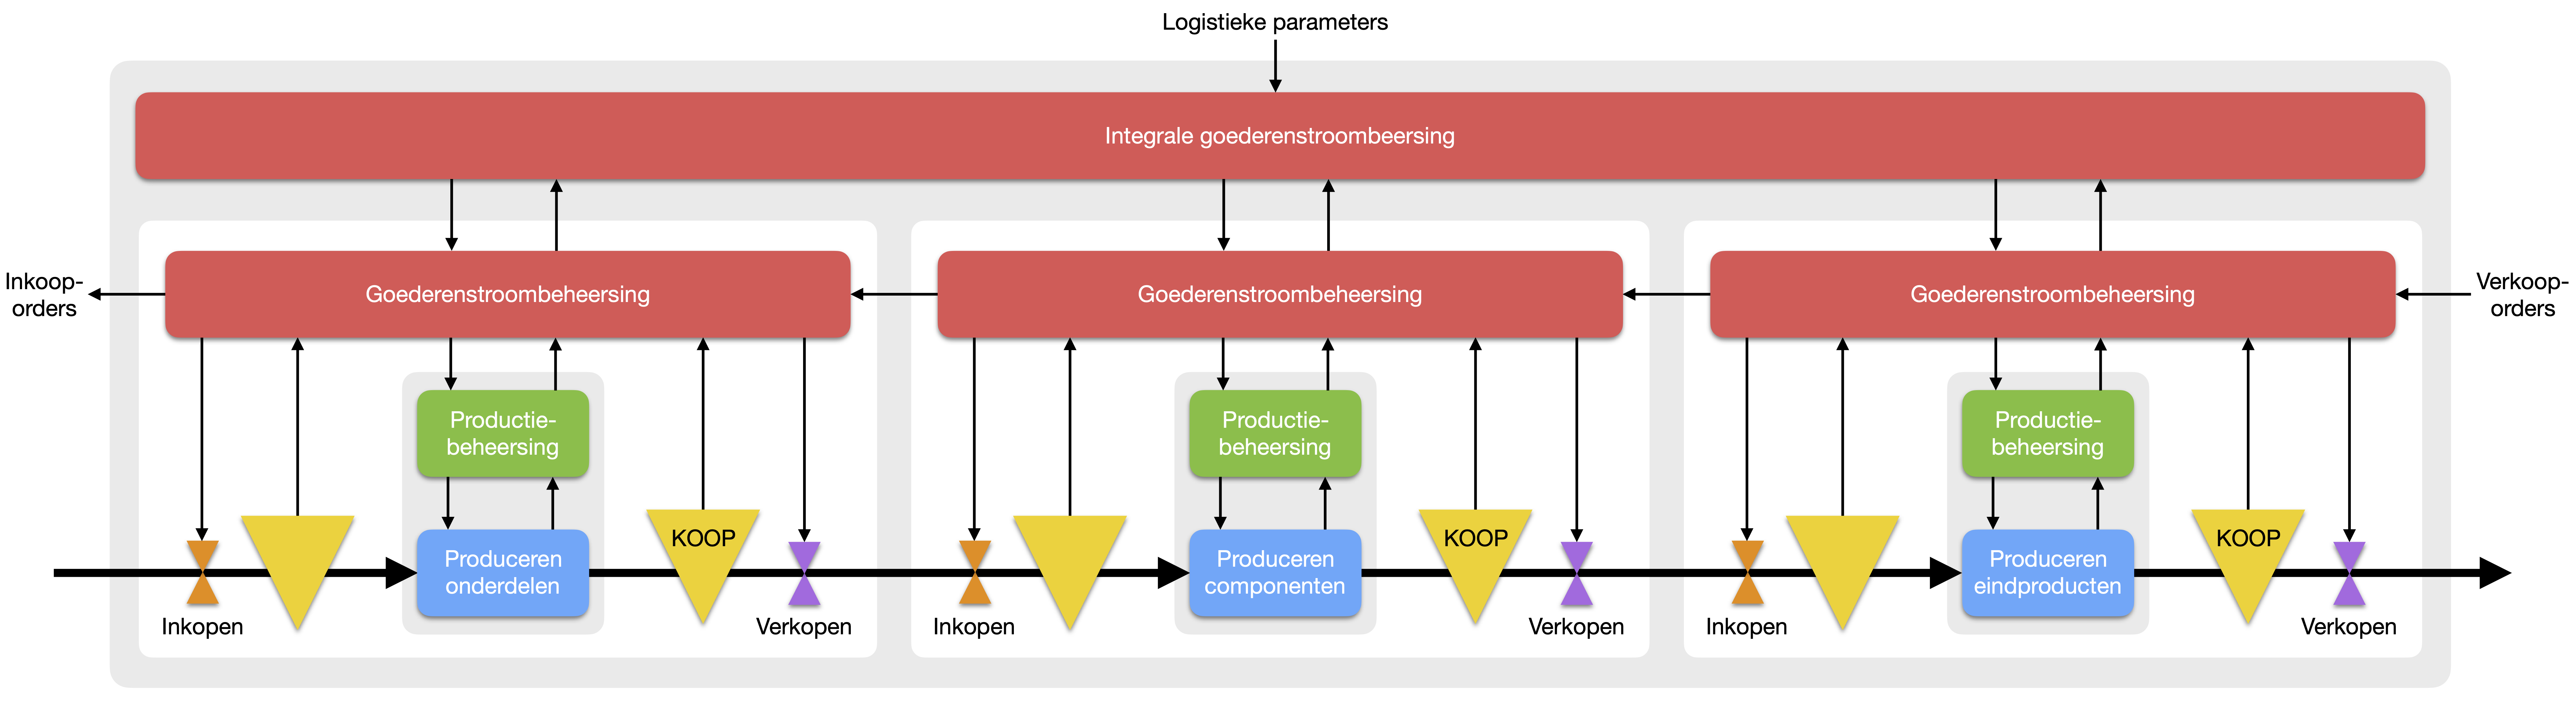

In [12]:
Image(filename='Besturingsconcept centraal.png', width=900)

Het besturingsconcept van de integrale goederenstroombeheersing is in onderstaand stock-flow model uitgewerkt. Hierbij is de gang van zaken op het niveau van de afzonderlijke productiesystemen sterk vereenvoudigd. Te zien is dat ieder schakel in de distributieketen door middel van slechts één stock is gemodelleerd, in deze stock wordt de voorraad en pijplijnvoorraad samengevoegd. Ook is een backlog met nog niet uitgeleverde klantorders met een stock-variabele weergegeven. Hiermee kan worden bewerkstelligt dat de eindvraag voor iedere schakel in de keten inzichtelijk is. In de eerdere simulaties was overigens sprake van zogenaamde "nee-verkopen": als niet aan de vraag kon worden voldaan, werd geen order geplaatst. Met de introductie van de backlog wordt de situatie van nee-verkoop vermeden.

Het model werkt als volgt. Een order voor eindproducten wordt in de backlog geplaatst. Als voldoende eindproducten op voorraad zijn, wordt de order met inachtneming van de levertijd van de eindproducten verwerkt. De voorraadnorm van de gehele distributieketen is de hoeveelheid orders of eindproducten in de backlog. Als de totale voorraad in de distributieketen (de som van de voorraad aan onderdelen, componenten en eindproducten) minder is dan de voorraadnorm, wordt een bestelling geplaatst bij de leverancier van de grondstoffen. Met een leververtraging komen deze grondstoffen binnen bij de onderdelenproducent, de onderdelen worden met een zekere leververtraging bij de producent van de componenten geleverd en deze maakt er met een vertraging componenten van die bij de eindproducent terechtkomen en daarna bij de klant.

De integrale goederenstroombeheersing werkt met slechts een globale regelkring gebaseerd op negatieve terugkoppeling. In de gehele keten wordt gewerkt met de eindvraag en er wordt door de regelaar gecorrigeerd voor alle lokale voorraden. In het model is een belangrijke aanname gedaan, namelijk dat de productiecapaciteit van de onderdelen, componenten en eindproducten toeneemt als het onderhandenwerk toeneemt. Er zijn met andere woorden geen beperkingen opgelegd aan de capaciteit. Dit is niet bijzonder realistisch, maar in de eerdere simulaties is hier ook geen rekening mee gehouden en dat is niet perse een probleem met het oog op het verklaren van het opslingereffect. Tijd om te controleren of het oscillatorisch gedrag van het distributiesysteem zal verminderen verminderd of zelfs geheel afwezig zal zijn.

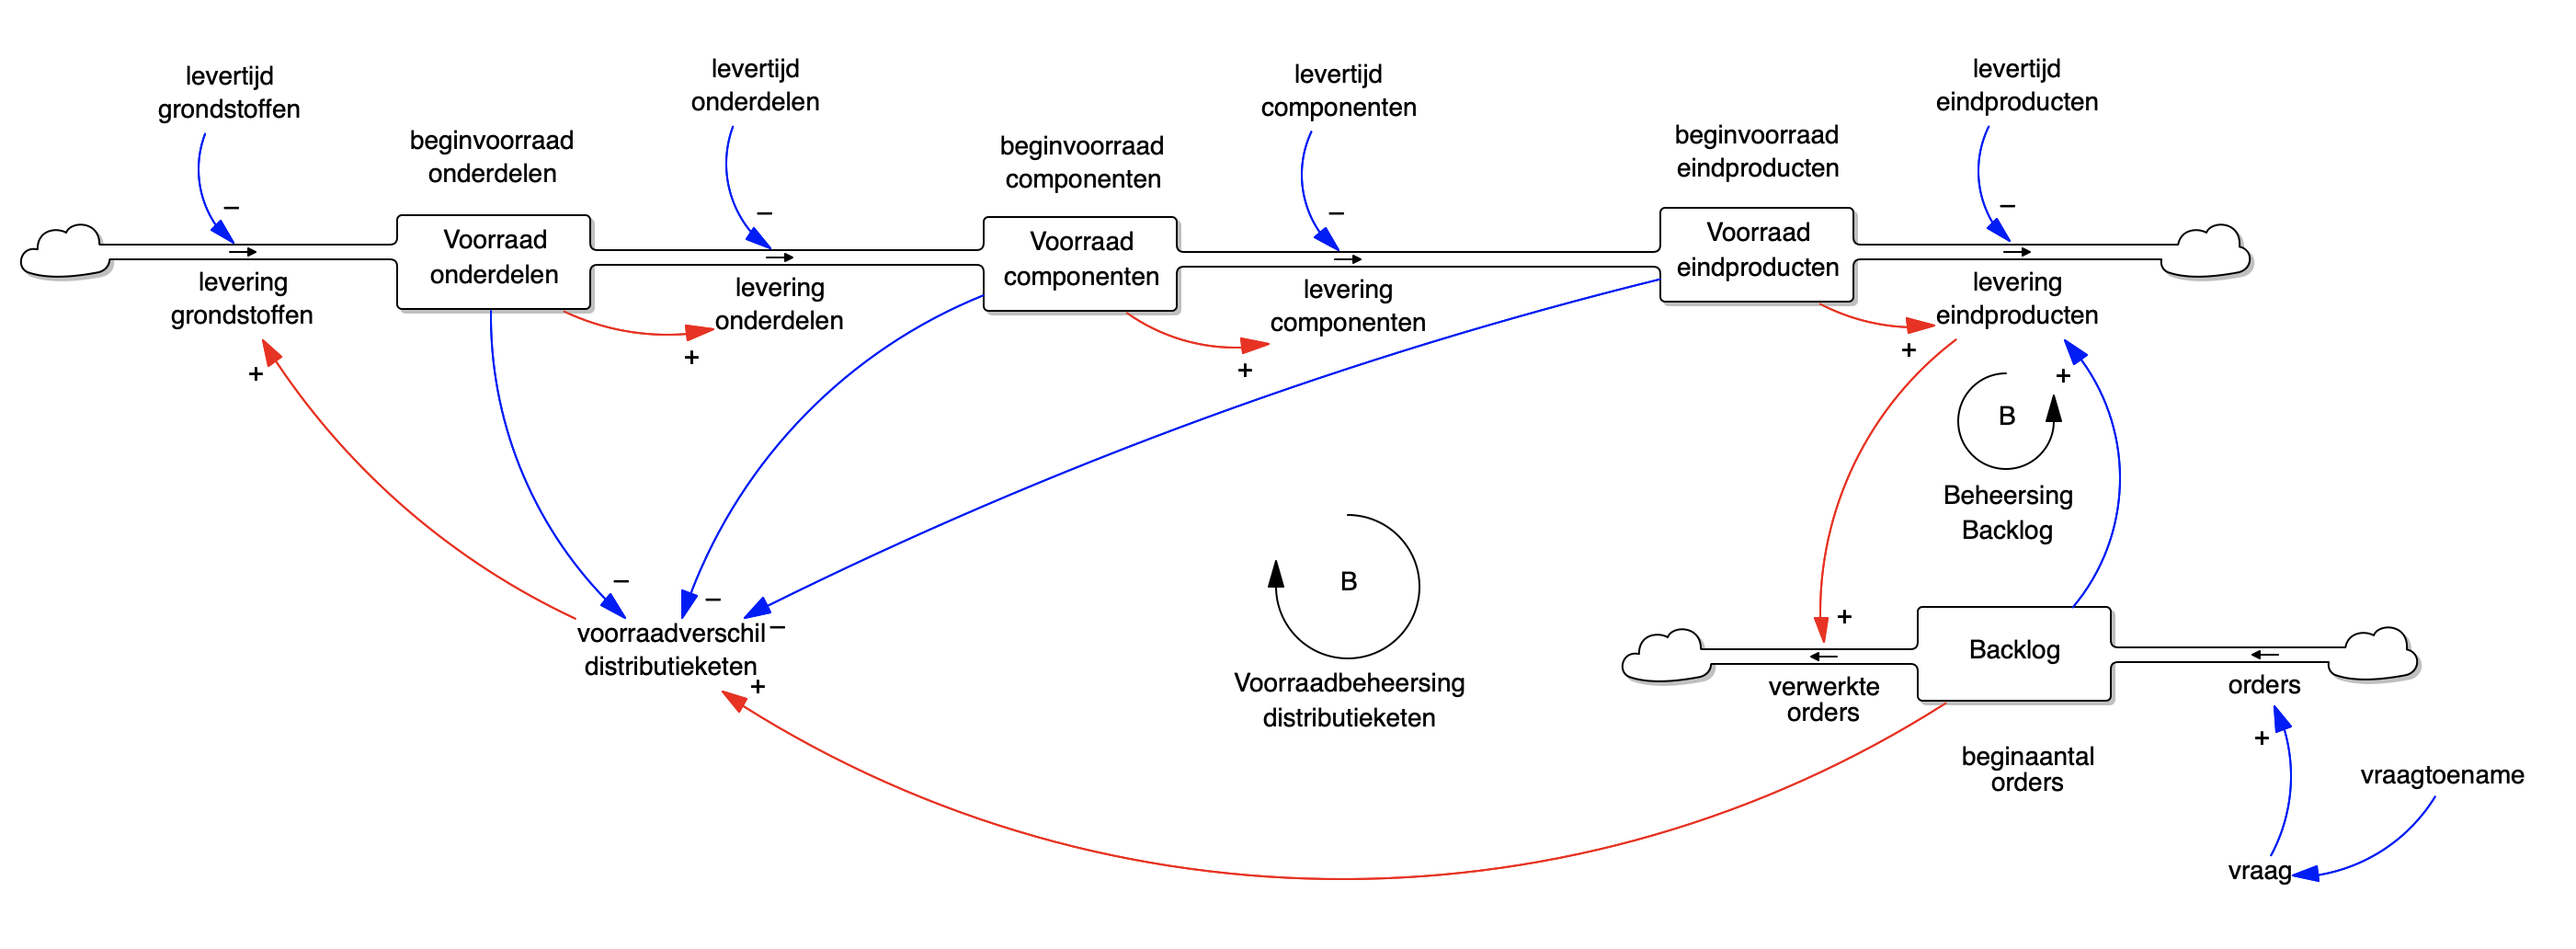

In [9]:
Image(filename='Integrale besturing.png', width=900)

Maak de volgende opdrachten:
1. Simuleer eerst het model van de distributieketen met centrale besturing zonder vraagtoename en met de standaard ingestelde levertijden en stel vast dat alle stocks of toestandsvariebelen zich in evenwicht of "steady state" bevinden.
2. Klik nu in het eerste tabblad de vraagtoename aan. In hoeverre is sprake van oscillatorisch gedrag in de wijze waarop het distribitiesysteem de vraagverandering verwerkt?
3. In hoeverre is sprake van een faseverschil tussen de voorraad eindproducten en componenten, de voorraad eindproducten en onderdelen en de voorraad componenten en onderdelen? Hoe kan een eventueel faseverschil in de tweede deelgrafiek (tijdsverloop voorraden in de sitributieketen) worden herkend?
4. Speel nu wat in het tabblad levertijden met de levertijden van de eindproducten, componenten, onderdelen en grondstoffen. In hoeverre is het distributiesysteem gedurende de transitie van het oude naar het nieuwe evenwicht in oscillatie te brengen?

In [37]:
%run Integraal.py

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<Figure size 576x288 with 0 Axes>

## Conclusies

In het model van de distributieketen met integrale goederenstroombeheersing is in technische termen sprake van een "exponentiële vertragingslijn". De backlog met orders past zich op basis van vraagverandering met een 1e-orde exponentiële vertraging aan, de voorraad onderdelen met een 2e-orde exponentiële vertraging, de voorraad componenten met een 3e-orde exponentiële vertraging en de voorraad eindproducten met een 4e-orde exponentiële vertraging. Hiermee wordt treffend uitgedrukt dat het verplaatsen van goederen in een distributieketen tijd kost. Leververtragingen zijn met andere woorden onvermijdelijk, oscillatorisch systeemgedrag is dat niet.

Het invoeren van een centrale globale regelking voor voorraadbeheersing in een distributieketen vraagt om de inzet van geavanceerde informatie- en communicatietechnologie (ICT). Sinds het ontdekken van het bullwhip effect in de jaren vijftig van de vorige eeuw door Jay W. Forrester is hier door bedrijven in met name  de *retail* veel werk van gemaakt. De ICT vraagt om stevige investeringen, maar daar staan ook veel baten tegenover. Niet alleen neemt de stabiliteit van tussen- en eindvoorraden toe, wat veel kostenbesparing in voorraadsystemen oplevert, maar ook kan de totale voorraad in de distributieketen substantieel afnemen, wat tot veel lagere voorraadkosten leidt.

Ondanks de evidente mogelijkheden tot kostenbesparingen in distributieketens worden deze lang niet altijd gerealiseerd. Een centrale regie vraagt namelijk om openheid en vertrouwen tussen partners in de distributieketen. Veel bedrijven stroomafwaarts in een distributieketen vinden hun leveranciers onbetrouwbaar. Andersom geldt dat veel leveranciers hun klanten opportunistisch in de wijze waarop deze op de vraag van hun klanten inspelen. Het zal weinig toelichting behoeven dat het bullwhip effect het vertrouwen over en weer geen goed zal doen. Hier wordt benadrukt dat de vooroordelen over-en-weer op basis van een systeemkundige benadering van de problematiek in een compleet ander licht komen te staan: er is eigenlijk geen sprake van onwil, maar vooral van misverstand.

## Referenties

Forrester, J.W. (1961), *Industrial Dynamics*, MIT Press, Cambridge, Mass.

Sterman, J. (2000), *Business Dynamics: Systems Thinking and Modeling for a Complex World*, Irwin/McGraw-Hill, Boston


© Jan-Peter Vos (2022)